In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# <font color=red>BEGINNER</font>

In [3]:
data = pd.read_csv('BITFINEX-BTCUSD.csv')
dataframe = pd.DataFrame(data)

In [10]:
dataframe.head()

,Date,High,Low,Mid,Last,Bid,Ask,Volume
0,2017-10-17,5810.0,5511.0,5554.95,5555.0,5554.9,5555.0,34328.915709
1,2017-10-16,5771.0,5570.0,5714.95,5715.0,5714.9,5715.0,32246.568791
2,2017-10-15,5877.0,5450.0,5715.95,5718.2,5715.9,5716.0,56987.011295
3,2017-10-14,5784.8,5564.3,5749.95,5749.9,5749.9,5750.0,34331.790824
4,2017-10-13,5920.0,5312.6,5644.50,5644.1,5643.1,5645.9,101794.582280


#### question 1  & question 2

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 8 columns):
Date      1253 non-null object
High      1253 non-null float64
Low       1253 non-null float64
Mid       1253 non-null float64
Last      1253 non-null float64
Bid       1253 non-null float64
Ask       1253 non-null float64
Volume    1253 non-null float64
dtypes: float64(7), object(1)
memory usage: 78.4+ KB


#### question 3

In [8]:
dataframe.dtypes

Date       object
High      float64
Low       float64
Mid       float64
Last      float64
Bid       float64
Ask       float64
Volume    float64
dtype: object

In [36]:
# since date is different and not a float, lets check Date out
type(dataframe['Date'][0])

str

In [37]:
print('Looks like our data in Date column is a string not a datetime object.')

Looks like our data in Date column is a string not a datetime object.


#### question 4

In [23]:
dataframe['Volume'].max()

269676.76000000001

In [609]:
# rounding off our answer
print(dataframe['Volume'].max().round(2))

269676.76


#### question 5

In [54]:
dataframe['Volume'].min()

0.0

In [73]:
# when was this low volume day? 
dataframe[dataframe['Volume'] == dataframe['Volume'].min()]

,Date,High,Low,Mid,Last,Bid,Ask,Volume
427,2016-08-09,0.0,0.0,583.455,604.1,573.95,592.96,0.0
428,2016-08-08,0.0,0.0,586.870,604.1,586.80,586.94,0.0


#### question 6 


In [607]:
dataframe['Low'].max()

5570.0

#### question 7

In [610]:
dataframe['High'].max()

5920.0

In [613]:
dataframe[dataframe.index.year == 2017]['Last']

Date
2017-10-17    5555.00
2017-10-16    5715.00
2017-10-15    5718.20
2017-10-14    5749.90
2017-10-13    5644.10
2017-10-12    5312.60
2017-10-11    4815.00
2017-10-10    4790.90
2017-10-09    4752.20
2017-10-08    4627.10
2017-10-07    4465.90
2017-10-06    4352.00
2017-10-05    4359.70
2017-10-04    4222.10
2017-10-03    4310.00
2017-10-02    4374.10
2017-10-01    4407.00
2017-09-30    4364.50
2017-09-29    4162.60
2017-09-28    4180.10
2017-09-27    4196.10
2017-09-26    3886.00
2017-09-25    3924.50
2017-09-24    3681.00
2017-09-23    3751.80
2017-09-22    3604.10
2017-09-21    3620.10
2017-09-20    3949.00
2017-09-19    3917.70
2017-09-18    4049.00
               ...   
2017-01-30     912.55
2017-01-29     919.43
2017-01-28     916.70
2017-01-27     915.37
2017-01-26     893.35
2017-01-25     886.45
2017-01-24     905.99
2017-01-23     923.72
2017-01-22     924.02
2017-01-21     896.14
2017-01-20     901.56
2017-01-19     888.14
2017-01-18     903.99
2017-01-17     830.10
2017-

### <font color=green>Taking a quick peak.</font>

In [113]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe.set_index('Date',inplace=True)

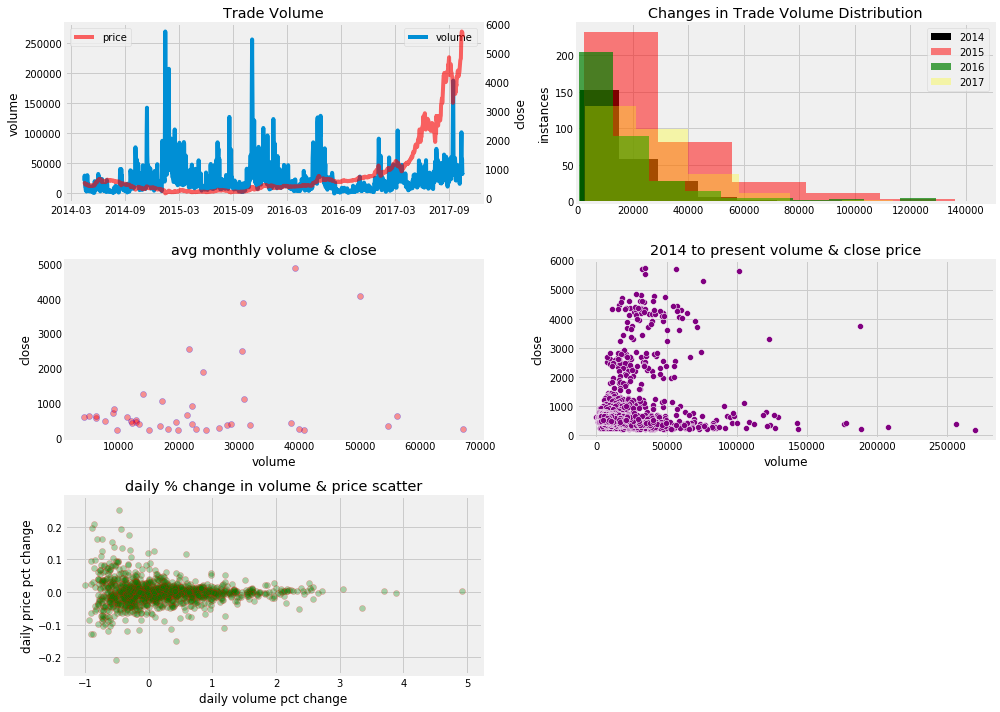

In [232]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(3,2,1)
plt.plot(dataframe['Volume'],label='volume')
plt.ylabel('volume')
plt.title('Trade Volume')
plt.legend()

ax2 = ax1.twinx()
plt.plot(dataframe['Last'],color='red',alpha=.6,label='price')
plt.grid(False)
plt.ylabel('close')
plt.legend()

ax3 = fig.add_subplot(3,2,2)
plt.hist(dataframe[dataframe.index.year == 2014]['Volume'],\
        color='black',label='2014')
plt.hist(dataframe[dataframe.index.year == 2015]['Volume'],\
        color='red',alpha=.5,label='2015')
plt.hist(dataframe[dataframe.index.year == 2016]['Volume'],\
        color='green',alpha=.7,label='2016')
plt.hist(dataframe[dataframe.index.year == 2017]['Volume'],\
         color='yellow',alpha=.3,label='2017')
plt.title('Changes in Trade Volume Distribution')
plt.ylabel('instances')
plt.xlim(0,150000)
plt.legend()

ax4 = fig.add_subplot(3,2,3)
plt.scatter(dataframe.resample('M')['Volume'].mean(),\
           dataframe.resample('M')['Last'].mean(),color='red',\
           alpha=.4,edgecolors='blue')
plt.grid(False)
plt.ylabel('close')
plt.xlabel('volume')
plt.title('avg monthly volume & close');

ax5 = fig.add_subplot(3,2,4)
plt.scatter(dataframe['Volume'],dataframe['Last'],color='purple',\
           edgecolors='white')
plt.ylabel('close')
plt.xlabel('volume')
plt.title('2014 to present volume & close price')

#volume & pct change 
ax6 = fig.add_subplot(3,2,5)
plt.scatter(dataframe['Volume'].pct_change(),dataframe['Last'].\
           pct_change(),color='green',alpha=.3,edgecolors='red')
plt.ylabel('daily price pct change')
plt.xlabel('daily volume pct change')
plt.title('daily % change in volume & price scatter')

plt.tight_layout();


# <font color=red>LESS BEGINNER</font>

In [615]:
# lets do a few things all in one step to set up our data set--steps below:
"""
1. read in the file
2. convert the date data from string to a date type so we can use it
3. set the index of the dataframe to the dates now that they have the data type we want
"""
raw = pd.read_csv('BITFINEX-BTCUSD.csv',parse_dates=['Date'],index_col='Date')

In [259]:
df = pd.DataFrame(raw)
df.head()

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2017-10-17,5810.0,5511.0,5554.95,5555.0,5554.9,5555.0,34328.915709
2017-10-16,5771.0,5570.0,5714.95,5715.0,5714.9,5715.0,32246.568791
2017-10-15,5877.0,5450.0,5715.95,5718.2,5715.9,5716.0,56987.011295
2017-10-14,5784.8,5564.3,5749.95,5749.9,5749.9,5750.0,34331.790824
2017-10-13,5920.0,5312.6,5644.50,5644.1,5643.1,5645.9,101794.582280


#### question 1

In [269]:
df[df.index.year == 2014]['Last'].mean()

470.44639919999997

In [274]:
# our answer rounded 
print(round(df[df.index.year == 2014]['Last'].mean(),2))

470.45


#### question 2

In [278]:
df.resample('A')['Last'].mean()

Date
2014-12-31     470.446399
2015-12-31     272.158892
2016-12-31     566.956620
2017-12-31    2334.664544
Freq: A-DEC, Name: Last, dtype: float64

In [283]:
# our answers rounded
df.resample('A')['Last'].mean().round(2)

Date
2014-12-31     470.45
2015-12-31     272.16
2016-12-31     566.96
2017-12-31    2334.66
Freq: A-DEC, Name: Last, dtype: float64

#### question 3

In [618]:
df[df.index == '2016-12-24']

,High,Low,Mid,Last,Bid,Ask,Volume,Vol pct_change
Date,,,,,,,,
2016-12-24,920.0,859.0,917.245,918.99,916.95,917.54,26019.004039,2.521724


In [621]:
df[df.index == '2016-12-14']['High']

Date
2016-12-14    788.87
Name: High, dtype: float64

#### question 4

In [326]:
df.resample('M')['Volume'].mean().sort_values(ascending=False).head()

Date
2015-01-31    67127.895348
2016-06-30    56194.500342
2015-11-30    54761.936784
2017-09-30    50161.993495
2015-02-28    40743.666296
Name: Volume, dtype: float64

#### question 5

In [328]:
df.resample('M')['Volume'].mean().sort_values(ascending=False).head(12)

Date
2015-01-31    67127.895348
2016-06-30    56194.500342
2015-11-30    54761.936784
2017-09-30    50161.993495
2015-02-28    40743.666296
2015-03-31    39934.971814
2017-10-31    39248.068061
2015-12-31    38607.835689
2014-11-30    31764.865307
2017-03-31    30865.641425
2017-08-31    30713.241338
2017-07-31    30430.105529
Name: Volume, dtype: float64

### <font color=green>Taking a quick peak.</font>

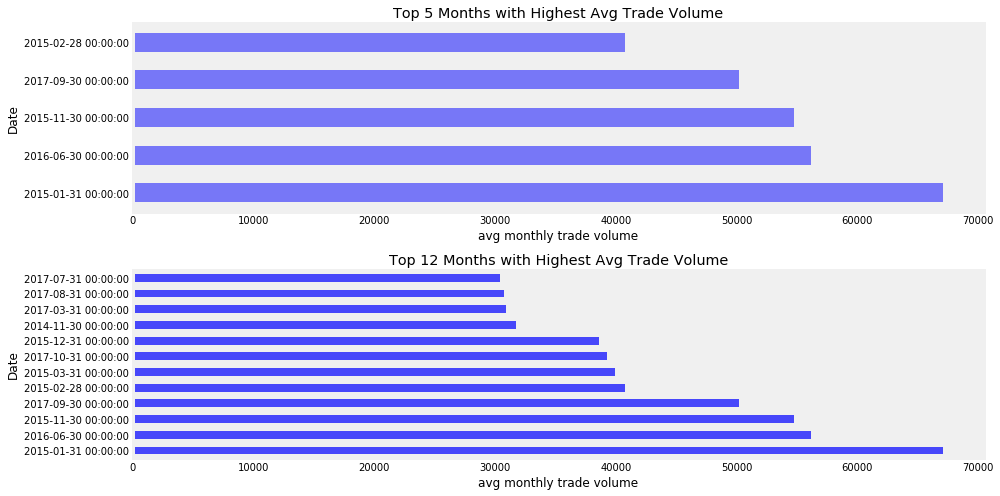

In [392]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(2,1,1)
(df.resample('M')['Volume'].mean().sort_values(ascending=False)\
 .head()).plot(kind='barh',color='blue',alpha=.5)
plt.xlabel('avg monthly trade volume')
plt.title('Top 5 Months with Highest Avg Trade Volume')
plt.grid(False)

ax2 = fig.add_subplot(2,1,2)
(df.resample('M')['Volume'].mean().sort_values(ascending=False)\
.head(12)).plot(kind='barh',color='blue',alpha=.7)
plt.xlabel('avg monthly trade volume')
plt.title('Top 12 Months with Highest Avg Trade Volume')
plt.grid(False)
plt.tight_layout()

#### question 6

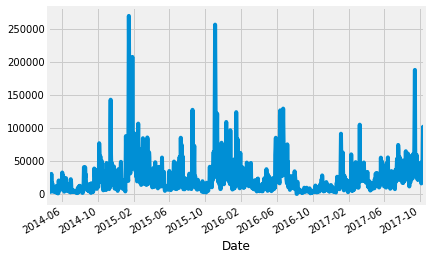

In [623]:
df['Volume'].plot();











### <font color=green>Random poking</font>

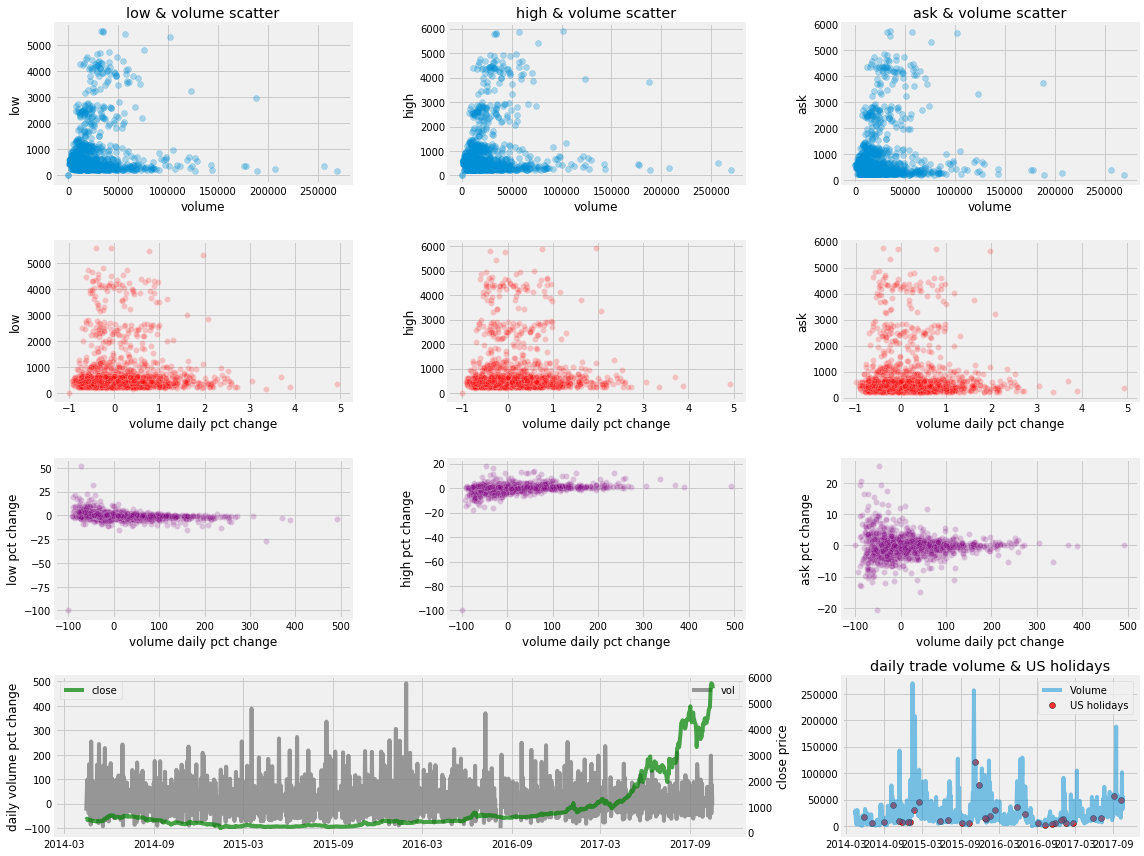

In [606]:
######
from matplotlib.gridspec import GridSpec
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

#how many US Holidays are in our dataset?
holidays = calendar.holidays(calendar,start=df.index.min(), end=df.index.max())
######

fig = plt.figure(figsize=(16,12))
gridspec = GridSpec(4,3)

ax1 = fig.add_subplot(gridspec[0,0])
plt.scatter(df['Volume'],df['Low'],alpha=.3)
plt.ylabel('low')
plt.xlabel('volume')
plt.title('low & volume scatter')

ax2 = fig.add_subplot(gridspec[0,1])
plt.scatter(df['Volume'],df['High'],alpha=.3)
plt.xlabel('volume')
plt.ylabel('high')
plt.title('high & volume scatter')

ax3 = fig.add_subplot(gridspec[0,2])
plt.scatter(df['Volume'],df['Ask'],alpha=.3)
plt.ylabel('ask')
plt.xlabel('volume')
plt.title('ask & volume scatter')

ax4 = fig.add_subplot(gridspec[1,0])
plt.scatter(df['Volume'].pct_change(),df['Low'],color='red',\
           alpha=.2,edgecolors='white')
plt.ylabel('low')
plt.xlabel('volume daily pct change')


ax5 = fig.add_subplot(gridspec[1,1])
plt.scatter(df['Volume'].pct_change(),df['High'],color='red',\
           alpha=.2,edgecolors='white')
plt.ylabel('high')
plt.xlabel('volume daily pct change')


ax6 = fig.add_subplot(gridspec[1,2])
plt.scatter(df['Volume'].pct_change(),df['Ask'],color='red',\
           alpha=.2,edgecolors='white')
plt.ylabel('ask')
plt.xlabel('volume daily pct change')

ax7 = fig.add_subplot(gridspec[2,0])
plt.scatter(df['Volume'].pct_change()*100,df['Low'].pct_change()*100\
            ,color='purple',alpha=.2,edgecolors='white')
plt.ylabel('low pct change')
plt.xlabel('volume daily pct change')


ax8 = fig.add_subplot(gridspec[2,1])
plt.scatter(df['Volume'].pct_change()*100,df['High'].pct_change()*100,color='purple',\
           alpha=.2,edgecolors='white')
plt.ylabel('high pct change')
plt.xlabel('volume daily pct change')


ax9 = fig.add_subplot(gridspec[2,2])
plt.scatter(df['Volume'].pct_change()*100,df['Ask'].pct_change()*100,color='purple',\
           alpha=.2,edgecolors='white')
plt.ylabel('ask pct change')
plt.xlabel('volume daily pct change')

ax10 = fig.add_subplot(gridspec[3,0:2])
plt.plot(df['Volume'].pct_change()*100,\
         color='grey',alpha=.8,label='vol')
plt.ylabel('daily volume pct change')
plt.legend()
ax10a = ax10.twinx()
plt.plot(df['Last'],label='close',color='green',alpha=.7)
plt.ylabel('close price')
plt.grid(False)
plt.legend()
plt.ylabel('close price');

ax11 = fig.add_subplot(gridspec[3,2])
plt.plot(df['Volume'],alpha=.5)
plt.scatter(df[df.index.isin(holidays)].index,\
           df[df.index.isin(holidays)]['Volume'],\
            color='red',alpha=.8,edgecolors='black',label='US holidays')
plt.title('daily trade volume & US holidays')
plt.legend()

plt.tight_layout();